# This dataset consists of data describing used vehicles for sale in the United States
## URL: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
### Click the link above and "download" button to download the data set
### Questions: 
### 1) What is the average cost of a used car that is less than $100k?
### 2) What are the most common manufactures of used cars?
### 3) How far have used cars traveled on average?

In [9]:
import pandas as pd
import statistics
import matplotlib.pyplot as plt
vehicles = pd.read_csv('vehicles.csv', sep=',', header=0)
vehicles.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [10]:
print(list(vehicles))

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']


In [17]:
list(vehicles.index)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


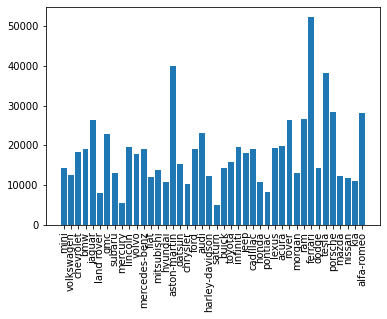

In [12]:
man = set(vehicles['manufacturer'].tolist())
man = set(x for x in man if x ==x)
mans = {x: 0 for x in man}
num_cars = {x: 0 for x in man}
def get_costs(row):
    comp = row['manufacturer']
    cost = row['price']
    if comp in mans and cost == cost and cost < 100000:
        mans[comp] = mans[comp] + cost
        num_cars[comp] = num_cars[comp] + 1
vehicles.apply(get_costs, axis=1)
for c in man:
    if num_cars[c] > 0:
        mans[c] = mans[c] / num_cars[c]
comp_names = list(mans.keys())
avg_cost = list(mans.values())
plt.bar(range(len(comp_names)), avg_cost, tick_label=comp_names)
plt.xticks(rotation=90)
plt.show()

In [13]:
pd.pivot_table(vehicles, values=['year', 'odometer'], index=['manufacturer'])

,odometer,year
manufacturer,,
acura,77527.153924,2013.808632
alfa-romeo,34668.399103,2016.994426
aston-martin,22353.958333,2011.416667
audi,66060.754915,2014.500594
bmw,76193.385926,2012.829308
buick,100671.775862,2010.976913
cadillac,79680.888808,2011.467568
chevrolet,106170.587919,2009.727063
chrysler,102332.100571,2010.833693


<AxesSubplot:xlabel='manufacturer'>

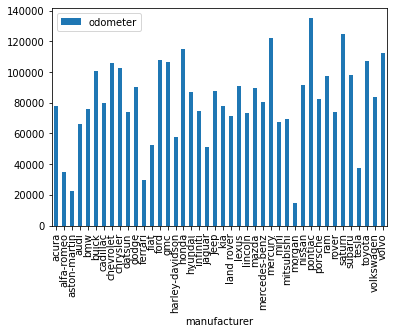

In [14]:
pd.pivot_table(vehicles, values=['odometer'], index=['manufacturer']).plot.bar()

In [15]:
vehicles.groupby(['transmission']).mean()

,id,price,year,odometer,county,lat,long
transmission,,,,,,,
automatic,7.311565e+09,74881.003396,2011.080415,106408.002272,NaN,38.696062,-95.672083
manual,7.311930e+09,198416.336452,2000.469015,137595.376012,NaN,38.878829,-97.401170
other,7.310962e+09,30003.788376,2016.331737,37812.334791,NaN,37.321391,-88.935454


In [16]:
vehicles.groupby(['cylinders']).mean()

,id,price,year,odometer,county,lat,long
cylinders,,,,,,,
10 cylinders,7.311410e+09,21507.802062,2009.519337,104208.036729,NaN,37.377445,-91.793549
12 cylinders,7.311571e+09,54299.382775,2005.483254,78340.990148,NaN,38.415747,-99.530668
3 cylinders,7.312027e+09,12296.996947,2012.172840,56269.571649,NaN,38.332601,-102.893486
4 cylinders,7.311872e+09,10545.301370,2011.780847,99499.136884,NaN,38.856444,-96.744429
5 cylinders,7.312331e+09,7842.779790,2007.706192,132637.510588,NaN,38.857440,-93.745129
6 cylinders,7.311605e+09,58696.317058,2011.153778,101516.325182,NaN,38.421296,-94.433797
8 cylinders,7.311529e+09,139595.722142,2007.804405,112278.792911,NaN,38.737036,-95.569970
other,7.311973e+09,17110.077812,2008.405239,130059.213735,NaN,38.932882,-105.000020


### 1) What is the average cost of a used car that is less than $100k?
The graph above indicates that the average lies around the \\$20k mark, with the majority of used cars being sold at between \\$10k-20k. A few outlier groups, such as ferrari, aston martin, and tesla, resell at aroud a much higher \\$40-50k
### 2) What are the most common manufacturers of used cars?
According to the odometer readings, the most common manufacturers include acura, bmw, buick, cadillac, honda, hyundai, jeep, lexus, mercedes-benz, etc. 
### 3) How far have used cars traveled on average?
Cars have traveled 98k miles on average. 5, 8, and 10 cylinder cars have traveled the most on average. 3 cylinder cars have traveled the least on average. Honda, mercury, and pontiac manufactures have produced the cars that traveled the farthest. Used Aston martin cars on the craiglist market have the least range on average.  